In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.model_selection as ms
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
data_read = pd.read_csv("https://raw.githubusercontent.com/DangCao1999/ML-Study/master/BaiHoc/KNN%20Classification/BaiTapVn/datingTestSet.csv")

In [5]:
X = data_read[['fly', 'videos game']]
y = data_read.like

0    largeDoses
1    smallDoses
2     didntLike
3     didntLike
4     didntLike
Name: like, dtype: object

# Tách dữ liệu thành 2 phần từ 0 - 995

In [46]:
X_train = X.iloc[0:995]
print(X_train.shape)

(995, 2)


# Train

In [47]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X_train.values)

KMeans(n_clusters=3, random_state=100)

In [48]:
print("Center cluster:")
print(kmeans.cluster_centers_)

Center cluster:
[[6.65151384e+04 8.71728117e+00]
 [1.14776728e+04 4.05769864e+00]
 [3.63833548e+04 7.75371823e+00]]


# Visualize sau khi đã train

In [49]:
print("Label pre:")
pred_label = kmeans.predict(X_train.values)
print(pred_label)

Label pre:
[2 1 2 0 2 0 2 2 0 2 2 0 1 2 0 2 0 0 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 0 1 0 0
 1 1 2 2 1 2 2 2 2 2 2 2 1 1 0 2 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 2 0 1 2 1 1
 2 2 0 0 2 2 0 1 2 2 2 0 1 1 0 0 2 1 0 1 0 2 1 1 1 2 2 2 1 2 2 1 2 1 0 1 1
 1 2 2 0 1 0 2 1 2 1 2 1 2 1 2 2 2 1 0 2 1 1 2 2 2 1 2 0 1 2 2 2 2 1 1 2 0
 1 1 1 1 2 2 2 0 1 1 0 0 2 1 1 2 0 1 0 2 2 1 1 1 2 0 0 2 2 1 0 2 2 1 2 1 1
 1 1 1 2 1 2 1 2 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2 2 0 1 2 0 1 2 2 1 2 0 0
 1 2 1 0 2 0 2 1 1 1 0 2 2 0 1 0 1 1 0 2 0 1 1 1 0 1 2 2 0 0 0 1 1 1 1 2 0
 1 2 0 2 1 2 1 2 2 2 1 1 2 0 0 0 1 0 0 1 0 2 2 1 1 2 1 2 1 2 2 0 1 2 1 0 2
 2 0 2 1 1 2 2 0 1 2 1 2 1 1 1 2 2 1 0 2 2 2 1 2 2 1 2 0 2 0 2 0 2 2 1 0 2
 2 2 1 0 1 1 2 2 2 0 2 2 1 1 0 0 1 2 2 1 1 0 0 0 2 2 1 0 2 2 1 0 2 2 2 2 1
 0 1 0 2 0 0 0 2 1 1 0 1 0 2 1 0 2 1 0 0 0 0 0 2 1 2 1 0 0 1 0 1 2 1 2 1 2
 1 2 1 1 1 0 2 2 2 0 1 2 0 0 1 2 0 2 0 0 1 1 0 1 1 1 2 0 0 2 2 0 2 0 2 2 0
 0 2 2 1 2 1 1 1 2 2 0 1 2 1 1 1 2 2 0 0 2 2 1 2 2 1 1 2 2 1 2 2 0 1 2 1 0
 0 0 0 2 2 2 2

In [90]:
print(y[1])

smallDoses


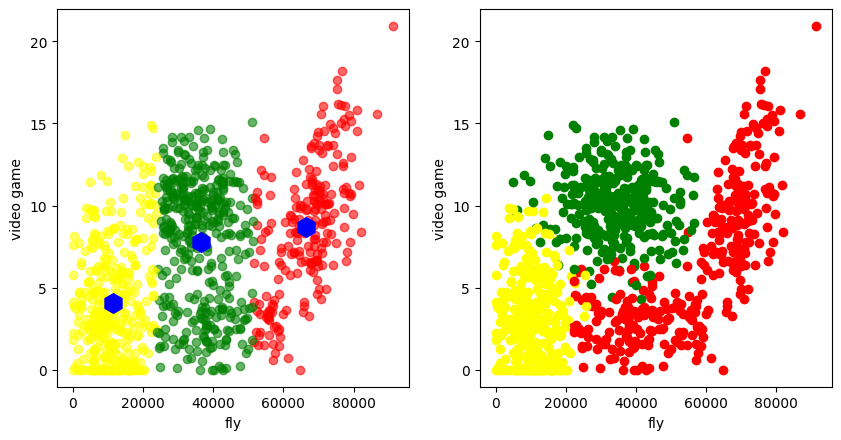

In [95]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=100)
for i in range(X_train.shape[0]):
    if pred_label[i] == 0:
        color = "red"
    elif pred_label[i] == 1:
        color = "yellow"
    elif pred_label[i] == 2:
        color = "green"
    axes[0].scatter(X['fly'][i], X.iloc[i,1], color=color, alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="blue", marker="h", alpha=1, s=200)


for i in range(X_train.shape[0]):
    if y[i] == 'largeDoses':
        color1 = 'green'
    elif y[i] == 'smallDoses':
        color1 = 'yellow'
    else:
        color1 = 'red'

    axes[1].scatter(X_train['fly'][i], X_train['videos game'][i], color=color1)

axes[0].set_xlabel("fly")
axes[0].set_ylabel("video game")
axes[1].set_xlabel("fly")
axes[1].set_ylabel("video game")
plt.show()

# Ghi chú thêm
* green - largeDoses
* yellow - smallDoses
* red - didntLike

In [96]:
learnLabels = {
    0: "didntLike",
    1: "smallDoses",
    2: "largeDoses",
}

# Câu 2 Dự đoán 3 điểm bất kỳ

In [97]:
value_test = X.iloc[996]
value_test = X.iloc[996]
X_test = [value_test]
pred_X_test = kmeans.predict(X_test)[0]
print("Cluster {}: '{}'".format(pred_X_test, learnLabels[pred_X_test]))
print("true value: "+y.iloc[996])

Cluster 0: 'didntLike'
true value: didntLike


In [98]:
value_test = X.iloc[997]
value_test = X.iloc[997]
X_test = [value_test]
pred_X_test = kmeans.predict(X_test)[0]
print("Cluster {}: '{}'".format(pred_X_test, learnLabels[pred_X_test]))
print("true value: "+y.iloc[997])

Cluster 2: 'largeDoses'
true value: largeDoses


In [99]:
value_test = X.iloc[998]
value_test = X.iloc[998]
X_test = [value_test]
pred_X_test = kmeans.predict(X_test)[0]
print("Cluster {}: '{}'".format(pred_X_test, learnLabels[pred_X_test]))
print("true value: "+y.iloc[998])

Cluster 2: 'largeDoses'
true value: largeDoses


In [ ]:
X_test = [[3,40000]]
pred_X_test = kmeans.predict(X_test)[0]
print("Cluster {}: '{}'".format(pred_X_test, learnLabels[pred_X_test]))
print("true value: "+y.iloc[998])